# SQL QUERY:
### SELECT year,avg_temp FROM city_data WHERE city = 'Singapore'

### SELECT year,avg_temp FROM global_data


# Tools for Each Step
### Only Jupyter on Python
# How did you calculate the moving average?
### Below there will be a code for it. Basically, calculation to analyze data points by creating a series of averages of different subsets of the full data set.
# What were your key considerations when deciding how to visualize the trends?
### The clearness of the graph which is labels and legends. Title is also a must.

In [1]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Import data
gdata = pd.read_csv('gdata.csv')
cdata = pd.read_csv('cdata.csv')

In [3]:
#Checking data
gdata.head(1)

,year,avg_temp
0,1750,8.72


In [4]:
cdata.head(1)

,year,avg_temp
0,1825,26.43


In [5]:
#Check if missing value exist
cdata.isna().sum()

year         0
avg_temp    17
dtype: int64

In [6]:
#Check if missing value exist
gdata.isna().sum()

year        0
avg_temp    0
dtype: int64

In [7]:
#Filling missing values with mean
cdata = cdata.fillna(cdata.mean())

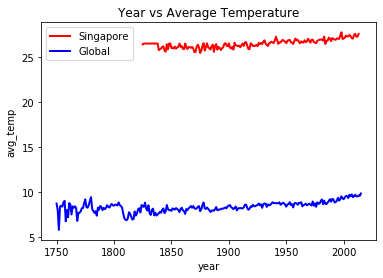

In [8]:
#Plot the avg_temp over year
plt.plot( 'year', 'avg_temp', data=cdata, marker='', color='red', linewidth=2, label='Singapore')
plt.plot( 'year', 'avg_temp', data=gdata, marker='', color='blue', linewidth=2, label='Global')
plt.title('Year vs Average Temperature')
plt.xlabel('year')
plt.ylabel('avg_temp')
plt.legend()
#Old Code
# gdata.plot(y='avg_temp',x='year', c='red')
# plt.title('Global')
# cdata.plot(y='avg_temp',x='year', c='blue')
# plt.title('Singapore')

### We see that the there's a fluctuation and the graph isn't very smooth. We will have to apply moving windows to smooth out the graph.
### Based on the graph, we see there's a slight increase of average temperature over time after 1850. This is the golden time where industry is revolutionized by machine since the discovery of steam engine by James Watt 

In [9]:
#Moving Average Algorithms 
window_size = 20
series = cdata['avg_temp']
windows = series.rolling(window_size)
moving_averages = windows.mean()

moving_averages_list = moving_averages.tolist()
without_nans = moving_averages_list[window_size - 1:]

In [10]:
#Adding new column to the dataframe
cdata['mov_avg'] = np.array(moving_averages_list)

In [11]:
#Moving Average Algorithms 
window_size = 20
series = gdata['avg_temp']
windows = series.rolling(window_size)
moving_averages = windows.mean()

moving_averages_list = moving_averages.tolist()
without_nans = moving_averages_list[window_size - 1:]

In [12]:
#Adding new column to the dataframe
gdata['mov_avg'] = np.array(moving_averages_list)

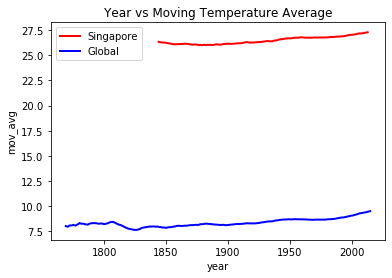

In [13]:
#Plot the moving average over year
#Plot the avg_temp over year
plt.plot( 'year', 'mov_avg', data=cdata, marker='', color='red', linewidth=2, label='Singapore')
plt.plot( 'year', 'mov_avg', data=gdata, marker='', color='blue', linewidth=2, label='Global')
plt.title('Year vs Moving Temperature Average')
plt.xlabel('year')
plt.ylabel('mov_avg')
plt.legend()
#Old code
# gdata.plot(y='mov_avg',x='year', c='red')
# plt.title('Global')
# cdata.plot(y='mov_avg',x='year', c='blue')
# plt.title('Singapore')

### We see that now the graph is  smooth. We can see clearly the increase of temperatures over time.
### We can take the same conclusion from the graph before since it basically a same data.

# Is your city hotter or cooler on average compared to the global average? Has the difference been consistent over time?
### My city is hotter on average compared to the global average because I think it is because it is close to the equator. Yes it has been consistent over time.
# “How do the changes in your city’s temperatures over time compare to the changes in the global average?”
### Based on the graph before, before 1950, the curve isn't similar from the local data and global data. But, as it progresses, it is close to similar that it is scary. The temperature is increasing steeply.
# What does the overall trend look like? Is the world getting hotter or cooler? Has the trend been consistent over the last few hundred years?
### Yes the world is getting hotter and with such high speed also. No, the world is getting hotter ONLY in these recent year. Before 1875, it is even decreasing.
# What's the difference between your local plot and global plot?
### The one difference that I could find is that every point in the local plot is a summation of global plot and some values. That means that overall the temperature is hotter here, but the rate of increase or decrease for both of them is the same. 